## INTRO 
- Run the simple linear regression with Tensorflow DL framework.
The idea is showing how tf work with simplist examples with Boston house dataset
- General train process :
    - Step 1) Load the data, transform to the right size, and split to train,valid, test set 
    - Step 2) Define variables (y=w*x+b), weight, bias for example 
    - Step 3) Define cost, optimizer, super-parameter ( learn-rate for example)
    - Step 4) Intiate the variables and optimizer
    - Step 5) Run the model (with tf.Session() as sess, sess.run(init))
    

## REF 
- https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845

In [12]:
# OP
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

# DL 
import tensorflow as tf
from tensorflow.python.ops.metrics_impl import  accuracy

In [2]:
# LOAD THE DATA 
total_features, total_prices = load_boston(True)

# SPLIT TO TRAIN, VALIDATION, TEST SET 

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

In [3]:
# sample X train data 
train_features[:3]

array([[ -6.41131126e-01,   1.00803985e-01,  -1.03067021e+00,
         -3.14485451e-01,   2.17757002e-01,   2.19427174e-01,
          8.26098070e-02,  -9.55971610e-02,  -2.15826599e+00,
         -2.32544281e-01,  -1.00268807e+00,   4.20545707e-01,
         -9.23483688e-01],
       [ -6.09771235e-01,  -5.93509179e-01,  -2.83216038e-01,
         -3.14485451e-01,  -4.17103062e-01,   9.45806783e-04,
          5.53520080e-01,   3.48016313e-01,  -1.53926045e+00,
         -1.01526137e+00,   9.27468208e-02,   4.20545707e-01,
         -2.52348069e-01],
       [ -6.09801116e-01,  -5.93509179e-01,  -2.83216038e-01,
         -3.14485451e-01,  -4.17103062e-01,   1.08484038e+00,
         -5.83195447e-02,   3.48016313e-01,  -1.53926045e+00,
         -1.01526137e+00,   9.27468208e-02,   3.26456136e-01,
         -1.07674783e+00]])

In [4]:
# sample y train data 
train_prices[:3]

array([ 24. ,  21.6,  34.7])

In [5]:
print ('train X dataset shape',train_features.shape)
print ('train y dataset shape',train_prices.shape )

train X dataset shape (300, 13)
train y dataset shape (300,)


In [6]:
# DEFINE THE VARIABLES 
# y= x*w + b 

# 1) weight (w) size : [data_feature_size, output_size]
# tf.truncated_normal() as an initial value, which generates a regularised set of numbers from the normal probability distribution
# or you can use tf.zeros as well -> i.e. weights = tf.Variable(tf.zeros([13, 1]))
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))

# 2) bias size : [output_size]
# select tf.float64 as bias dtype here 
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [7]:
# HELP FUNC 

def calc(x, y):
# Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [14]:
# SET UP THE CALCULATE, SUPER PARAMETERS 

y, cost = calc(train_features, train_prices)
# Feel free to tweak these 2 values:
learning_rate = 0.025
epochs = 300
output = [[], []] # get the model train history 
accuracy = []

In [9]:
# INIT THE VARIABLES  AND THE optimizer
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


epoch :  0 error :  674.652751885
epoch :  100 error :  78.8136182244
epoch :  200 error :  78.7360855572


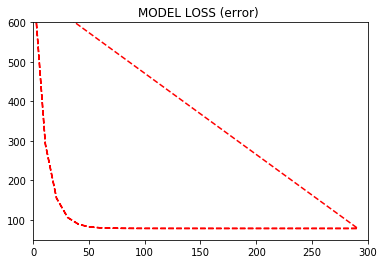

Validation error = 104.347628127 

Test error = 123.346126366 



In [20]:
# TRAIN THE MODEL 

with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            output[0].append(i+1)
            output[1].append(sess.run(cost))

        if i % 100 == 0:
            print('epoch : ',i ,'error : ', sess.run(cost))
        
        # for accuracy plot 
        #valid_predict = calc(valid_features, valid_prices)[0]
        #accuracy.append.(tf.metrics.accuracy(labels, valid_accuracy))
           
            
    plt.title('MODEL LOSS (error) ')
    plt.plot(output[0], output[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()
    
    #plt.title('MODEL ACCURACY  ')
    #plt.plot(output[0], output[1], 'r--')
    #plt.axis([0, epochs, 50, 600])
    #plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_cost), '\n')

In [21]:
# end of demo
# TODO :
    # 1) add accuracy,
    # 2) learning curve plots 
    # 3) grid search 
    